## Quantified Self : Analyzing Personal Garmin Data (2012-2017)

## Anuj Katiyal (ak3979)

### Insights into my fitness journey over the last 5 years

I have been an avid runner for the past 5 years, and what has been a fun part of all those is how much we can learn about ourselves from exploring the data we capture.

I started capturing data about myself around the year 2012, which was when we saw the advent of wearable devices, and have always wanted to carry out an analysis to gain insights about my running patterns, my strength training schedules, my diet logs and any other metadata which I can collect about myself like the Heart Rate, Cadence for runs and also the step counts.

About **[Quantified Self](http://quantifiedself.com/)** : When learning about the ways to explore about the data you capture, I came across the term Quantified Self and have been following the blog ever since. Its just amazing how capturing and analyzing data about yourself can actually help me make data driven decision to improve your lifestyle and so many people are joining this movement and bringing a data-driven change to improve their lives.

** Questions which I would like to answer in my project analysis are as follows : **

* [How much time have I spent on various activities like Running, Treadmill Running, Strength Training Sessions, Cycling and Cardio Sessions?](#section1)
* [What is a count of the activities and how do they vary across specific months over the span of 5 years?](#section2)
* [Activity Day Analysis : What has been the most active day in the week and the distribution of activities across specific days of a week](#section3)
* [Calorie Analysis : An analysis of the distribution of calories burnt during activities, along with the distribution of calories burnt during specific activities and detecting outliers (which I am happy about)](#section4)
* [Scatterplot Matrix to analyze all the continuous variables in the dataset](#section5)
* [How many calories have I burnt in total for every activity and see any trends for the activities across the years 2012-2017? *Interactive Plot using D3.js*](#section6)
* [What is the hour of the day that I usually do the activities and how has it changed over the past 5 years? It will help me relive the changes that have happened in my life and how they have affected my schedules. **Interactive Plot using D3.js**](#section7)
* [Analyzing the trend of how the Activity minutes vary across the months for years 2012-2016. **Interactive D3.js visualization**](#section8)
* [Analyzing the trend of how my running mileage varies across the months for the year data 2012-2016. **Interactive Plot using D3.js**](#section9)
* [Analysis of the total minutes spent on each activity type during the months in year 2012-17](#section10)
* [Analyzing average calories burnt for every activity type during the months of years 2012-17](#section11)
* [Analyzing average heart rate based activity levels and its variation along the aggregated days of the week and aggregated activity types](#section12)


I do take inspiration from the [Quantified Self Running archives](http://quantifiedself.com/running/) and will try and do an analysis on all these aspects about my data.

** Where the reader can find the data? **
I would like to share the data captured about all my activities if someone wants to analyze it, but as the data is about myself, I would probably not share it on a public platform. You can always mail me to get the data at ** `anujk3@gmail.com` **.

** Team ** : I will be working on my dataset and gaining insights through the analysis I do.

### Languages Used : 

Something I am really passionate about is doing data analysis work and Python has been my go to language for it. Through the course Exploratory Data Analysis and Visualizations, Prof. Joyce Robbins did help me realize how even `R` can help in quickly analyzing the data and actually the best part about `R` for me was getting to learn about `ggplot`. 

I still prefer using Python as my language for data analysis but hacked my way to use ggplot within the Python Analysis and will be doing most of my dataframe analysis in `Python` and making plots with `ggplot`, but all within a `Python Notebook`.

I will also be working on interactive visualizations using `D3.js` and whenever possible `matplotlib within Python`.

## Exploratory Data Analysis

### Import Statements and load Data

In [71]:
import pandas as pd
import math
import warnings
import numpy as np
from rpy2.robjects import pandas2ri
pandas2ri.activate()
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
%reload_ext rpy2.ipython
%matplotlib inline
pd.options.display.max_rows = 999

In [72]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;

    }
</style>
""")

### Load Data

In [73]:
path = "data/a"

frame = pd.DataFrame()
list_ = []

for i in range(1, 27):
    file_path = path + str(i)+ ".csv"
    #print(file_path)
    df = pd.read_csv(file_path, index_col=None, header=0, skiprows=2)
    list_.append(df)
    frame = pd.concat(list_)
    
frame.reset_index(inplace=True)
frame.drop("index", axis=1, inplace=True)
frame.drop(" Favorite", axis=1, inplace=True)
frame.drop("Unnamed: 11", axis=1, inplace=True)

In [74]:
#frame.columns

In [75]:
col_names = ['activityType', 'startTime', 'activityTime', 'actDistance', 'elevationGain', 'avgSpeed', 'avgHR', 'maxHR', 
            'steps', 'calories']
frame.columns = col_names

### Data Cleaning

** Ignore the swimming activity, only 1 row **


In [76]:
frame.drop(450, axis=0, inplace=True)

** Convert Elliptical to Cardio **

In [77]:
frame[frame["activityType"] == "Elliptical"]
frame.loc[384, "activityType"] = "Cardio"

** Ignore Walking as an activity **

In [78]:
frame.drop(frame[frame["activityType"] == "Walking"].index, axis=0, inplace=True)

** Ignore swimming as an activity as only 3 recorded activities **

In [79]:
frame[frame["activityType"] == "Lap Swimming"].index
frame.drop(frame[frame["activityType"] == "Lap Swimming"].index, axis=0, inplace=True)

** Activity type Strength Training was recording as Others in older Garmin Devices **

In [80]:
frame.drop([214, 221, 223, 242], axis=0, inplace=True)
frame.activityType = frame.activityType.str.replace("Other", "Strength Training")

** Activity Types Indoor Rowing and Indoor Cycling also included as Cardio **

In [81]:
frame.activityType = frame.activityType.str.replace("Indoor Rowing", "Cardio")
frame.activityType = frame.activityType.str.replace("Indoor Cycling", "Cardio")

** Correcting Data Errors and Data Types **

In [82]:
frame.loc[frame["activityType"] == "Strength Training", "actDistance"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "elevationGain"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "avgSpeed"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "steps"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "actDistance"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "elevationGain"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "avgSpeed"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "steps"] = np.NaN

In [83]:
frame["avgHR"] = frame["avgHR"].replace(['--', '0'], np.NaN)
frame["maxHR"] = frame["maxHR"].replace(['--', '0'], np.NaN)
frame["steps"] = frame["steps"].replace(['--', '0'], np.NaN)
frame["steps"] = frame.steps.str.replace(",", "")
frame['avgHR'] = frame.avgHR.astype(float)
frame['maxHR'] = frame.maxHR.astype(float)
frame['steps'] = frame.steps.astype(float)

In [84]:
frame["elevationGain"] = frame["elevationGain"].replace(['--', '0', 0], np.NaN)
frame.loc[[456, 495], "elevationGain"] = 328
frame["elevationGain"] = frame.elevationGain.str.replace(",", "")
frame['elevationGain'] = frame.elevationGain.astype(float)
frame["avgSpeed"] = frame.avgSpeed.str.replace(":", ".")
frame["avgSpeed"] = frame.avgSpeed.str.replace("--.--", '0.0')
frame['avgSpeed'] = frame.avgSpeed.astype(float)
frame['actDistance'] = frame.actDistance.astype(float)
frame["calories"] = frame.calories.apply(lambda x: str(x).replace(",", ""))
frame['calories'] = frame.calories.astype(float)

In [85]:
frame.drop(frame[frame["actDistance"] < 0.01].index, axis=0, inplace=True)
frame.reset_index(inplace=True)
frame.drop("index", axis=1, inplace=True)

In [86]:
running_data = frame.copy()
running_data.to_csv("vis1.csv")

### Exploring the data and the datatypes

** Initial Peek into the data **

In [87]:
running_data.head()

,activityType,startTime,activityTime,actDistance,elevationGain,avgSpeed,avgHR,maxHR,steps,calories
0,Strength Training,"Thu, 6 Apr 2017 10:43 PM",1:09:02,NaN,NaN,NaN,119.0,163.0,NaN,597.0
1,Strength Training,"Tue, 4 Apr 2017 10:36 PM",54:37,NaN,NaN,NaN,117.0,155.0,NaN,474.0
2,Strength Training,"Sun, 2 Apr 2017 10:46 PM",1:12:20,NaN,NaN,NaN,116.0,159.0,NaN,601.0
3,Strength Training,"Tue, 28 Mar 2017 11:02 PM",42:11,NaN,NaN,NaN,99.0,142.0,NaN,257.0
4,Strength Training,"Mon, 27 Mar 2017 11:17 PM",45:42,NaN,NaN,NaN,120.0,165.0,NaN,412.0


### Data Transformations

** Converting startTime to Python DateTime Format to use the inbuilt functions **

In [88]:
running_data["startTime"] = pd.to_datetime(running_data["startTime"])
#running_data.head()

** Concatenating information about the Month and Year for every activity to the DataFrame **

In [89]:
running_data["activityMonth"] = running_data.startTime.dt.month
running_data["activityDay"] = running_data.startTime.dt.dayofweek

In [90]:
running_data["activityMonthName"] = running_data.activityMonth.map({1:"January", 2:"February", 3:"March", 4:"April",
                                                                   5:"May", 6:"June", 7:"July", 8:"August", 
                                                                   9:"September", 10:"October", 11:"November", 12:"December"})

In [91]:
running_data["activityDayName"] = running_data.activityDay.map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday",
                                                                   4:"Friday", 5:"Saturday", 6:"Sunday"})

In [92]:
## To-Do : Divide the Heart Rate Zones from the data into Zones and create a new column
# < 114 - Very Light
# 114-133 - Light
# 133-152 - Moderate
# 152-171 - Hard
# >171 - Very Hard
## do using lambda: apply a function

def get_hr_zones(avgHR):
    if math.isnan(avgHR):
        return "Not Recorded"
    if avgHR < 114:
        return "Very Light"
    elif avgHR >= 114 and avgHR < 133:
        return "Light"
    elif avgHR >= 133 and avgHR < 152:
        return "Moderate"
    elif avgHR >= 152 and avgHR < 171:
        return "Hard"
    else:
        return "Very Hard"

In [93]:
running_data["activityLevel"] = running_data.avgHR.apply(get_hr_zones)

** Calculating total minutes of an activity from the data **

In [94]:
def getMinutes(activityTime):
    curr_time = activityTime.split(":")
    if len(curr_time) == 2:
        final_time = curr_time[0] + "." + curr_time[1]
    else:
#         print curr_time
        mins = int(curr_time[0])*60 + int(curr_time[1])
        final_time = str(mins) + "." + curr_time[2]
    return final_time

In [95]:
running_data["activityMins"] = running_data.activityTime.apply(getMinutes)
running_data["activityMins"] = running_data["activityMins"].astype("float")

In [96]:
running_data.drop("activityTime", axis=1, inplace=True)
#running_data.head()

In [97]:
#running_data.head()
running_data.to_csv("vis2.csv")

** Checking final data types **

In [98]:
running_data.dtypes

activityType                 object
startTime            datetime64[ns]
actDistance                 float64
elevationGain               float64
avgSpeed                    float64
avgHR                       float64
maxHR                       float64
steps                       float64
calories                    float64
activityMonth                 int64
activityDay                   int64
activityMonthName            object
activityDayName              object
activityLevel                object
activityMins                float64
dtype: object

## Initial Analysis of Data : Continuous Variables 

### MISSING VALUES 

In [99]:
running_data.describe()

,actDistance,elevationGain,avgSpeed,avgHR,maxHR,steps,calories,activityMonth,activityDay,activityMins
count,211.000000,80.000000,211.000000,336.000000,336.000000,82.000000,494.000000,494.000000,494.000000,494.000000
mean,5.018436,208.725000,9.970711,123.291667,157.639881,8519.463415,585.524291,6.447368,3.192308,63.260020
std,4.160373,284.234659,3.127073,17.777179,14.814820,8494.509896,455.932193,3.712304,2.070135,42.252763
min,0.240000,3.000000,0.000000,77.000000,81.000000,404.000000,0.000000,1.000000,0.000000,1.270000
25%,2.470000,51.500000,8.580000,111.000000,150.000000,3783.500000,244.500000,3.000000,1.000000,28.437500
50%,3.550000,112.500000,9.470000,121.000000,159.000000,4753.000000,482.500000,7.000000,3.000000,58.560000
75%,6.300000,257.500000,11.005000,135.000000,168.000000,9205.000000,816.500000,10.000000,5.000000,91.367500
max,26.340000,1943.000000,43.370000,168.000000,188.000000,42808.000000,3362.000000,12.000000,6.000000,280.590000


** Looking at the count of values for all the continuous variables, we observe that out of 494 activities, 211 activities had distance recorded, 80 activities had elevationGains recorded, the average speed was recorded for 211 activities, with average and max Heart Rate being recorded for 336 activities. **

** Calories, Activity Month, Activity Day and the Activity Minutes were recorded for all the activities **

Some of the reasons for missing data : 

1. During the span of 5 years, I have changed 4 wearable devices. Initially I used the Garmin Vivofit tracker for all the runs, which did not have heart rate tracker. 
2. After that I bought the Garmin Forerunner 920 (GPS inbuilt), which had a heart rate strap along with it and it also used to calculate the elevationGain and many more parameters for all the runs. But I do realize that I was lazy to use the heart rate strap as it needed to be washed after every run.
3. After that I used the Garmin Vivofit2 tracker, which had inbuilt heart rate monitor but lacked GPS, so the runs were still being tracked by Garmin Forerunner 920 and whenever were tracked using Vivofit2, lacked heart rate information.
4. Currently I am using the Garmin Vivoactive HR, which has an wrist HR monitor as well as an inbuilt GPS, but being in Graduate School, the frequency of runs has gone down significantly.

** All the variables in the analysis are important but lets do an initial missing data analysis with visualizations **

** *Visualization : Missing Data 1* **

In [100]:
running_data_continuous = running_data[running_data.describe().columns].copy()

NOTE: The following pairs of variables appear to have the same missingness pattern.
 Please verify whether they are in fact logically distinct variables.
     [,1]    [,2]   
[1,] "avgHR" "maxHR"


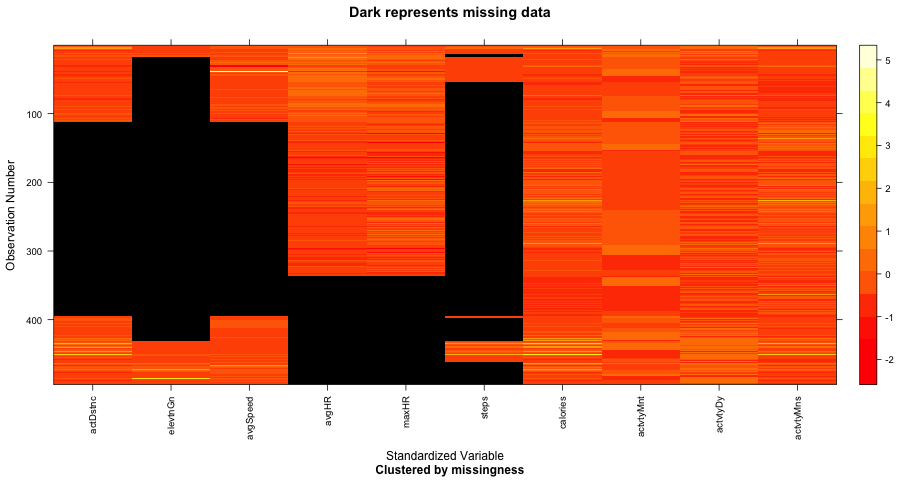

In [101]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(readr)
library(grid) # for gpar
library(RColorBrewer)
library(scales)
library(knitr)
library(mi)

image(missing_data.frame(running_data_continuous))

rm(list = ls())

** *Visualization : Missing Data 2* **


 Variables sorted by number of missings: 
      Variable Count
 elevationGain   414
         steps   412
   actDistance   283
      avgSpeed   283
         avgHR   158
         maxHR   158
      calories     0
 activityMonth     0
   activityDay     0
  activityMins     0


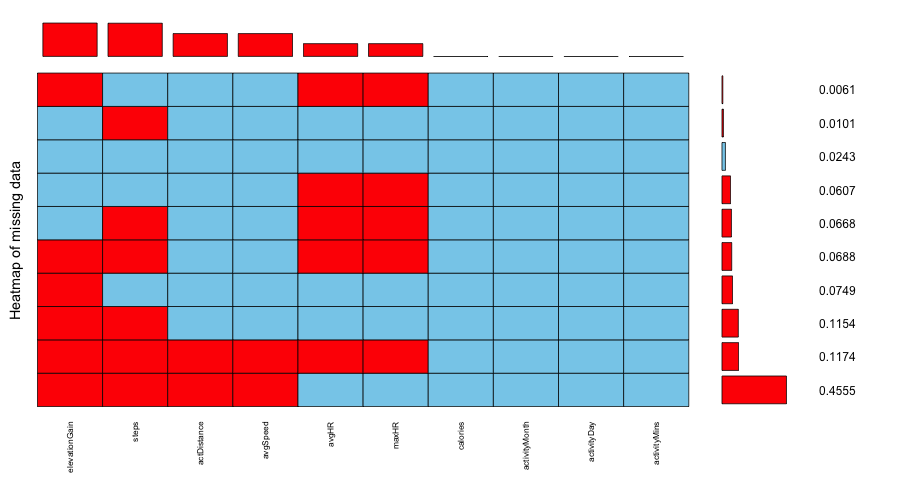

In [102]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(grid) # for gpar
library(RColorBrewer)
library("VIM")
library("mice")
library(lattice)

aggr_plot <- aggr(running_data_continuous, col=c('skyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(running_data_continuous), cex.axis=.7, gap=3, ylab=c("Heatmap of missing data"), combined= TRUE)
rm(list = ls())

** Looking at the above visualization, the following patterns emerge: **

1. Average Heart Rate and Maximum Heart Rate values are missing for those specific Activities when I was using a fitness tracker which did not have Heart Rate Tracking ability.
2. The statistics like Elevation Gain were tracked when I was using a heart rate strap attached, which being lazy I didn't use often, leading to the highest number of missing values, because of which we will **not consider it as an important feature in our analysis.**
3. For the first generation fitness tracker used like Garmin Vivofit 1 and 2, even though it had capabilities to record my Running Distance based on the number of steps take, it still did not process the other metrics like Average Speed and Heart rate values.
4. Also, the Running Distance values are missing for all workouts which involved Strength Training. *If there was some recorded value for this field during Strength Training sessions due to the number of steps taken, it has been ignored and replaced with NaNs in my analysis.*
5. Steps were recorded by the most recent fitness trackers used and therefore have a lot of missing values. During activities not involving Running, the Steps have not been considered and replaced with NaNs.

** From the above analysis, it can be seen that the most important features for further analysis are `Activity Minutes`, `Activity Month`, `Activity Day`, `Calories Burnt`, `Average Heart Rate`, `Maximum Heart Rate`, `Activity Distance Covered`. The other features, specifically, `Average Speed` , `Steps` and `Elevation Gain` have a higher number of missing values and will not be considered important for future analysis, even though `Average Speed` and `Steps` can help me analyze the runs and find some correlations. **

** *Visualization : Missing Data 3* (Analysis of average calories burnt during the activities for aggregated Months)**

In [103]:
running_data_heatmap = running_data.groupby(["activityType", "activityMonthName"]).calories.agg(["mean"])
running_data_heatmap.reset_index(inplace=True)
running_data_heatmap.rename(columns={'mean':'avgCalories'}, inplace=True)

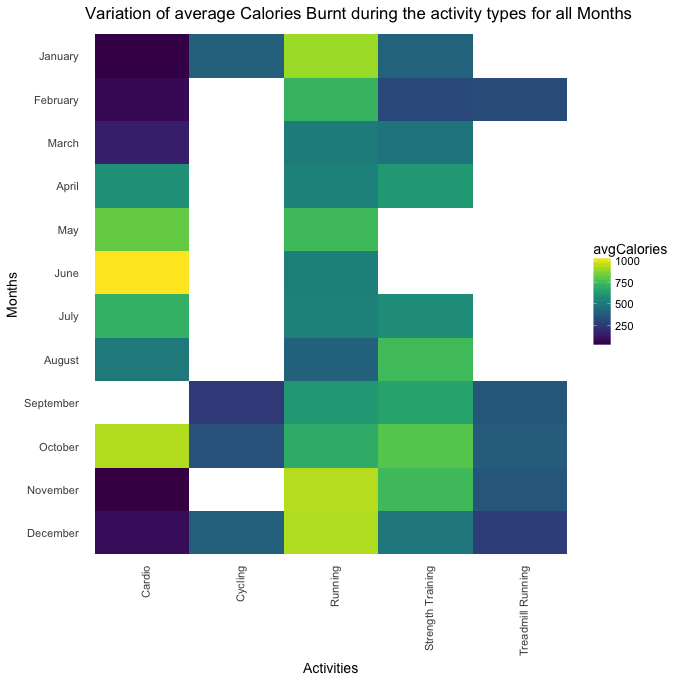

In [104]:
%%R -i running_data_heatmap -w 680 -h 680 -u px

require("ggplot2")
require("viridis")
library(dplyr)
library(grid) # for gpar
library(scales)
library(knitr)
library(heatmaply)
library(RColorBrewer)

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_heatmap$activityMonthName <- factor(running_data_heatmap$activityMonthName, levels = rev(orderedclasses))

theme_heat <- theme_classic(14) +
    theme(axis.line = element_blank(),
          axis.ticks = element_blank(), axis.text.x = element_text(angle = 90, hjust = 1))

g1 <- ggplot(running_data_heatmap, aes(x=activityType, y=activityMonthName, fill=avgCalories)) + 
    geom_tile() + theme_heat +
    ylab("Months") + scale_fill_viridis() +
    xlab("Activities") + ggtitle("Variation of average Calories Burnt during the activity types for all Months")
g1

** Analysis of the Visualization: **


    

## Univariate Data Analysis and Visualizations

** In this section, we will analyze the identified important features through our missing data analysis, namely, `Activity Minutes`, `Activity Month`, `Activity Day` and `Calories Burnt`. **

<a id="section1"></a>

### Feature : Activity Minutes 

** *i. Distribution Histogram with overlayed Density Plots, with varying binwidths also* **

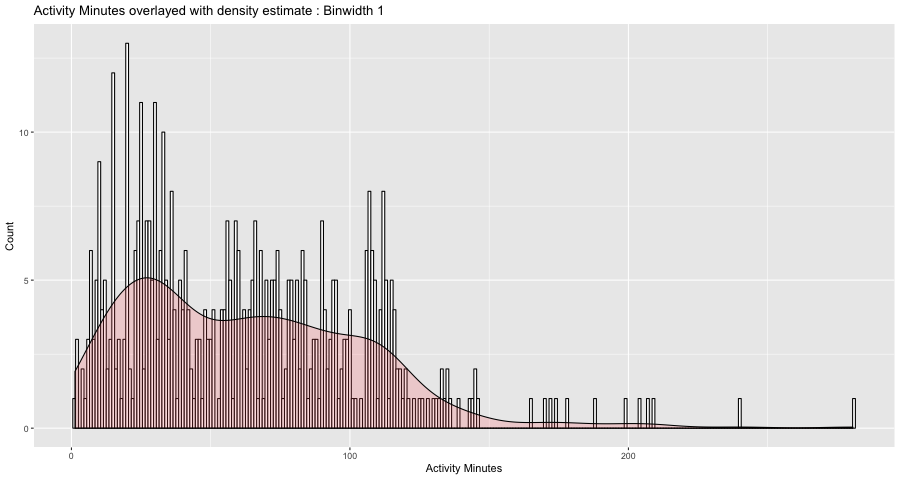

In [105]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

g1 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 1") 
g1

In [106]:
%R rm(list = ls())

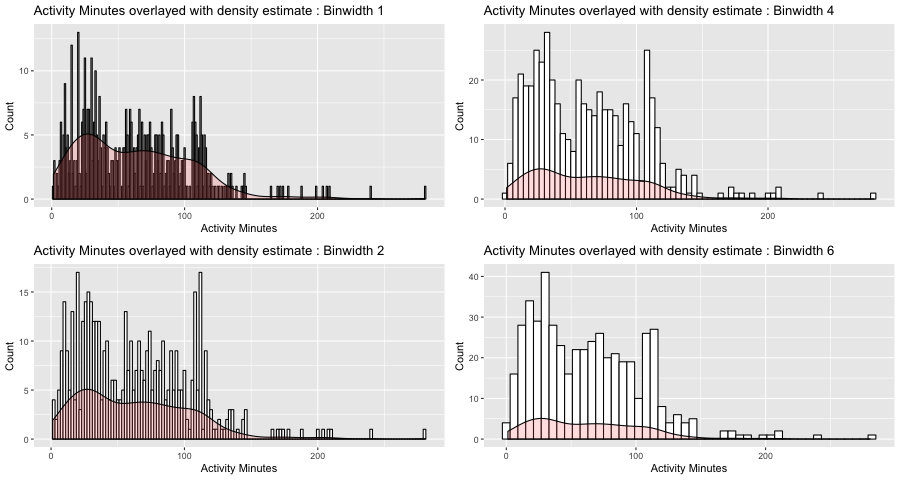

In [107]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}
g1 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 1")

g2 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 2")

g3 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=4,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 4")

g4 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=6,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 6")

multiplot(g1, g2, g3, g4, cols=2)

In [108]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the count of those activities on the y-axis.
2. The Distribution is clearly multi-modal skewed towards the right. Varying the binwidths also led to similar distributions showing the underlying pattern of the distribution.
3. Reasons for skewness include the practice runs while I was training for my first full Marathon in 2016, the full marathon and also instances when I forgot to stop the timer while recording activities.

** *ii. Distribution of Activity Minutes across various Activities* **

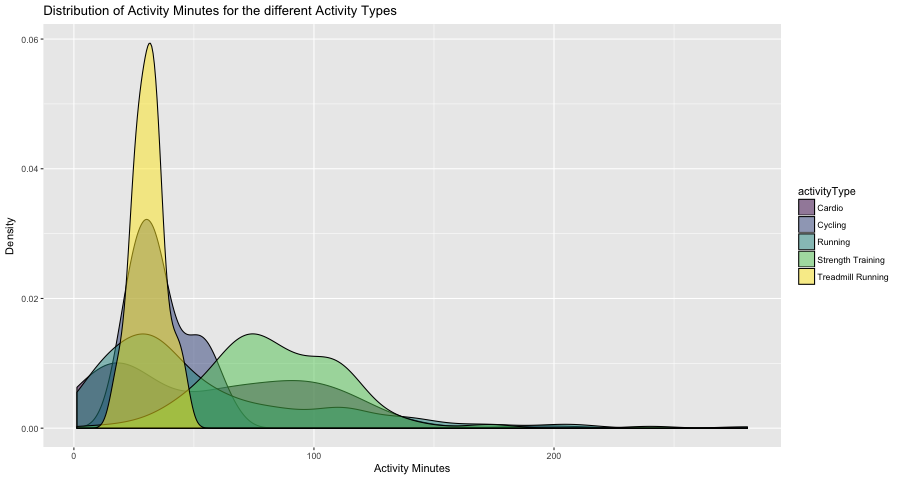

In [109]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

g1 <- ggplot(running_data, aes(x=activityMins, fill=activityType)) + 
    geom_density(alpha=0.5, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") +
    xlab("Activity Minutes") + scale_fill_viridis(discrete=TRUE) +
    ggtitle("Distribution of Activity Minutes for the different Activity Types")
g1

In [110]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distributions are nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual minutes I spend doing a particular activity type.

** *iii. Analysis of Outliers : Activity Minutes for the activities* **

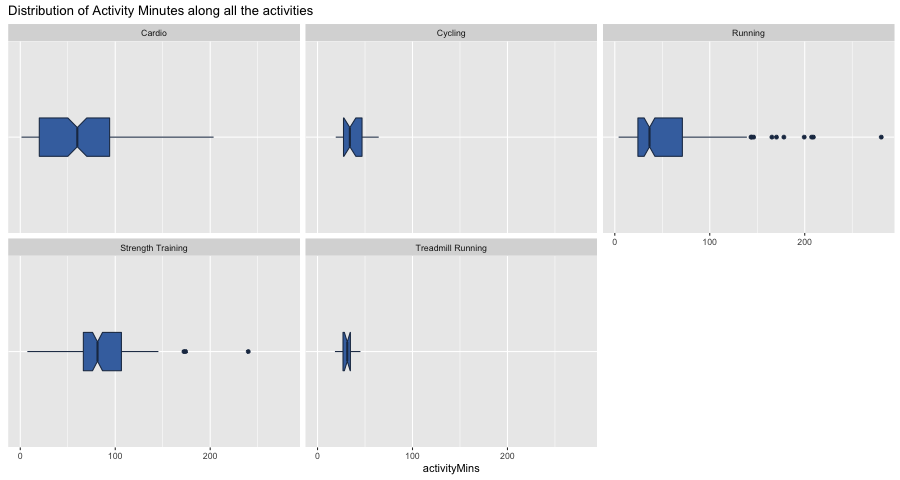

In [111]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=activityMins)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Activity Minutes along all the activities") + facet_wrap( ~ activityType)

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Activity Minutes.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual time zones doing a particular activity clearly.

In [112]:
%R rm(list = ls())

<a id="section2"></a>

### Feature : Activity Month

** *i. How many total activities have I done in every month for the past 5 years?* **

In [113]:
running_data_gMonth = running_data.groupby("activityMonthName").count()
running_data_gMonth = running_data_gMonth[["activityMonth"]]
running_data_gMonth.reset_index(inplace=True)
running_data_gMonth.rename(columns={'activityMonth':'Count'}, inplace=True)
# running_data_gMonth.head()

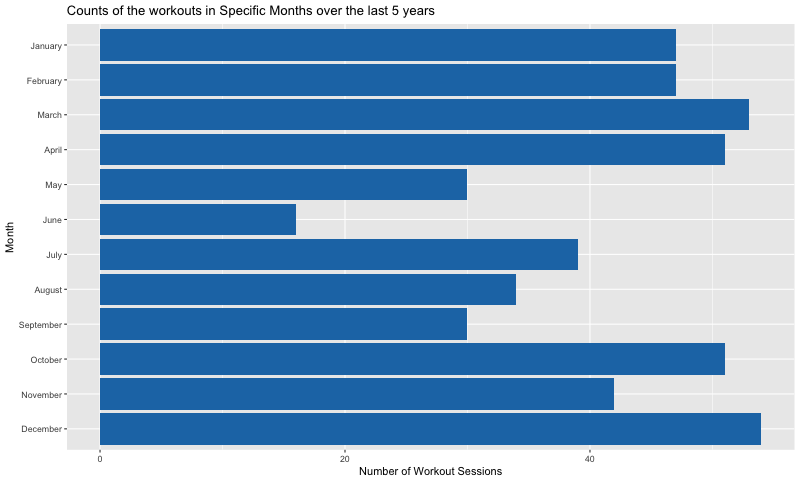

In [114]:
%%R -i running_data_gMonth -w 800 -h 480 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = rev(orderedclasses))

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count)) + 
  geom_col(fill = "#1f77b4") + 
  coord_flip() +
  theme(legend.position="none") +
  xlab("Month") +
  ylab("Number of Workout Sessions") + 
  ggtitle("Counts of the workouts in Specific Months over the last 5 years")

In [115]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month.
2. Okay, I will admit, this was an eye opener for me. I thought I have been regular to the gym, but the plot shows something different. The difference between the numbers can also be accounted for not tracking the specific workout sessions other than running for the years 2012-2014.
3. In the last 2 years, I have been tracking all my running workouts and the gym sessions and am happy that for some months atleast the number of workouts in the last 2-3 years did touch values greater 50, i.e., March, October and December specifically - probably the onset of Spring Season and the running season.
4. June has been the most dormant month for me, probably because of the extreme season(heat) in India during that time.

** *ii. How many specific activities have I done in every month for the past 5 years?* **

In [116]:
running_data["activityYear"] = running_data.startTime.dt.year

In [117]:
running_data_gMonth = running_data.groupby(["activityYear", "activityMonthName", "activityType"]).count()

In [118]:
running_data_gMonth = running_data_gMonth[["activityMonth"]]
running_data_gMonth.reset_index(inplace=True)
running_data_gMonth.rename(columns={'activityMonth':'Count'}, inplace=True)

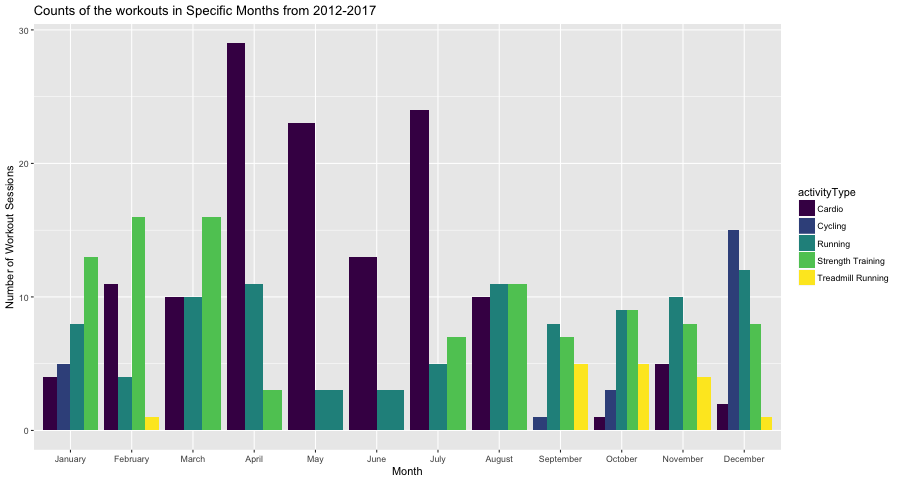

In [119]:
%%R -i running_data_gMonth -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = orderedclasses)

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count, fill = activityType)) + 
  geom_col(position="dodge") + 
  xlab("Month") +
  ylab("Number of Workout Sessions") +
  ggtitle("Counts of the workouts in Specific Months from 2012-2017") + scale_fill_viridis(discrete=TRUE)

In [120]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month for every activity type.
2. Some interesting facts come out of this analysis:
   * I have not tracked a strength training session for the Months of June and July, which makes it clear that I bought a device with that capability in 2016 around July and started capturing the strength sessions after that.
   * Cardio sessions are high during the summer season as compared to August - December which is the running season. 
   * Cycling sessions are few and indicate to citibike rides in NY after coming here in August 2016.

** *iii. Faceted by Year of the activity* **

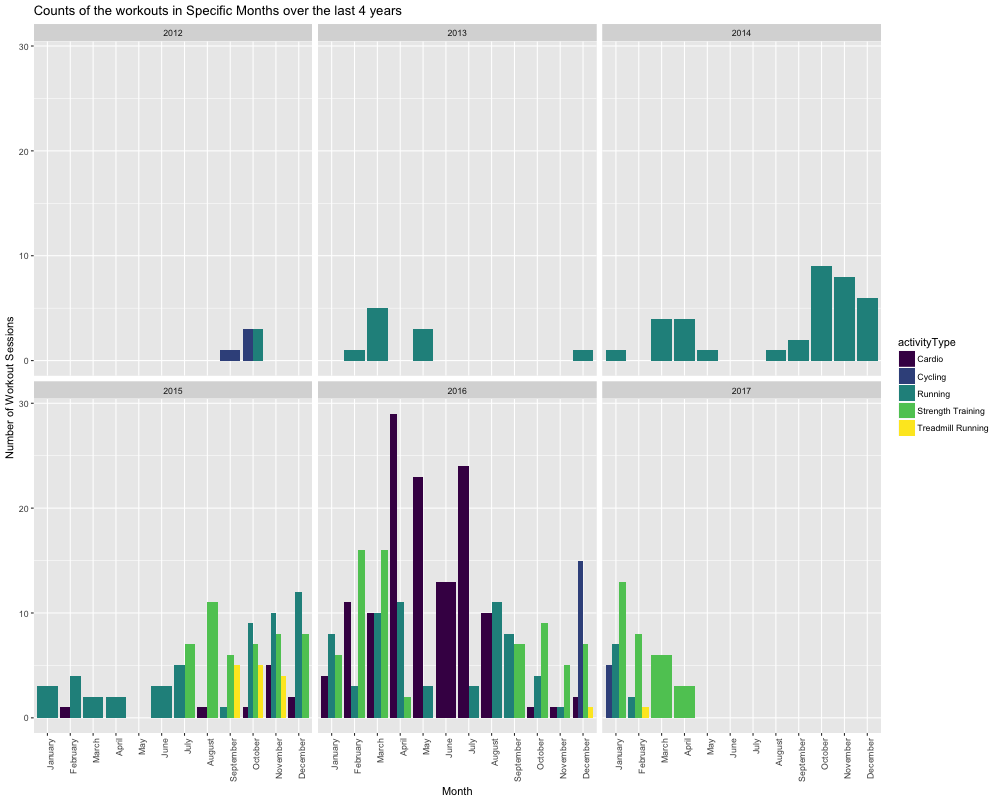

In [121]:
%%R -i running_data_gMonth -w 1000 -h 800 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = orderedclasses)

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count, fill = activityType)) + 
  geom_col(position="dodge") + facet_wrap(~ activityYear) +
  xlab("Month") + 
  ylab("Number of Workout Sessions") +
  ggtitle("Counts of the workouts in Specific Months over the last 4 years") + scale_fill_viridis(discrete=TRUE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [122]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month for every activity type faceted by Years.
2. I will write about every year and see how the journey has evolved,
    * **2012 and 2013** - Got into fitness tracking with a very basic first generation Garmin Vivofit and tracked a few runs and cycle session. Still was not much into tracking or realized importance of tracking the workouts.
    * **2014** - I started working at a company in Gurgaon, India and became a member of the running group Gurgaon Road Runners and that is how I got into fitness, and used to track all my runs with them. I did my first Delhi Half Marathon in December 2014 and tracked all my practice runs before it.
    * **2015** - The year I got into a rhythm of running and understood the idea of doing a few half marathons, then resting body for a few months before preparing for another marathon. I was tracking mostly my running sessions during the first half of the year but then I bought a better Garmin device with the ability to track my workouts also and I started capturing my strength training and cardio sessions from the second half of 2015.
    * **2016** - I was regular to gym, yoga and running and ran my first full marathon in January 2017. Also, tbe number of running sessions reduced significantly when I moved to NY in August 2016, but the strength training sessions increased.
    * **2017** - I have actually observed a decrease in running but tried and kept pace with the Strength training sessions which can be owed to a tough semester in Graduate School aided by extreme climate conditions.

<a id="section3"></a>

### Feature : Activity Day

** *i. Which activities on which day of the week?* **

In [123]:
running_data_activDay = running_data.groupby(["activityDayName", "activityType"])[['activityDay']].count()
running_data_activDay.rename(columns={'activityDay':'Count'}, inplace=True)
running_data_activDay.reset_index(inplace=True)
#running_data_activDay

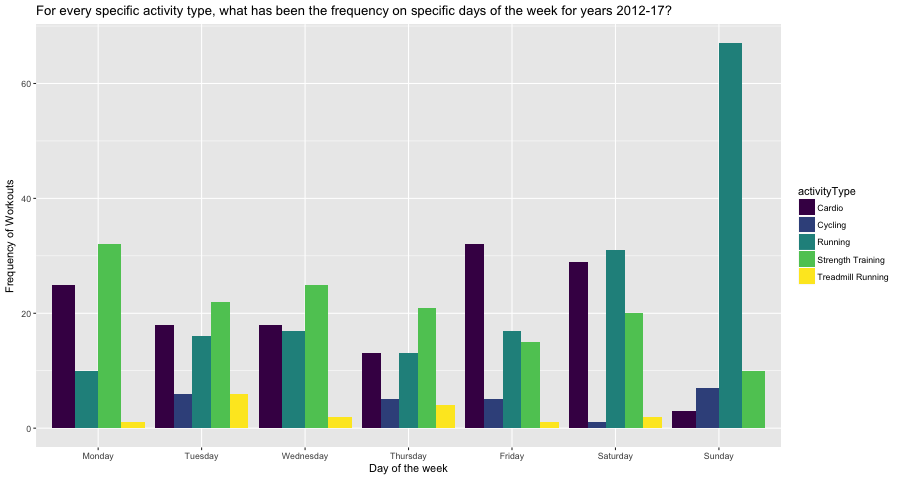

In [124]:
%%R -i running_data_activDay -w 900 -h 480 -u px

library(tidyverse)
library(ggplot2)
library(gridExtra)
require("viridis")

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_activDay$activityDayName <- factor(running_data_activDay$activityDayName, levels = orderedclasses)


g1 <- ggplot(running_data_activDay, aes(x = activityDayName, y = Count, fill=activityType)) +
  geom_col(position = "dodge") +  scale_fill_viridis(discrete=TRUE) + 
  xlab("Day of the week") +
  ylab("Frequency of Workouts") +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week for years 2012-17?")
g1

In [125]:
%R rm(list = ls())

** *ii. Which activities on which day of the week, faceted by activity?* **

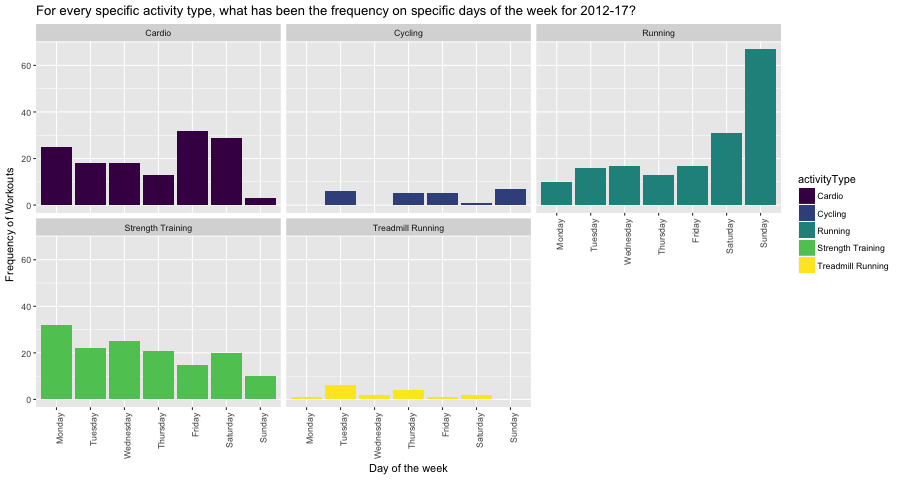

In [126]:
%%R -i running_data_activDay -w 900 -h 480 -u px

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_activDay$activityDayName <- factor(running_data_activDay$activityDayName, levels = orderedclasses)

g2 <- ggplot(running_data_activDay, aes(x = activityDayName, y = Count, fill=activityType)) +
  geom_col() + facet_wrap(~activityType) + scale_fill_viridis(discrete=TRUE) +
  xlab("Day of the week") +
  ylab("Frequency of Workouts") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week for 2012-17?")
g2

In [127]:
%R rm(list = ls())

** Analysis of the above visualizations: **

1. In the plots above, I am showing the total number of workouts done on a specific day of the week over the last 5 years of tracked workouts.
2. The obvious patterns from the plots are as follows:
    * The strength training sessions are evenly distributed over all the days of the week except for Sundays (rest day/running day).
    * The running count increases as I go into the week with the highest running frequency on the weekends.
    * The number of cardio and treadmill running sessions are few as compared to the other workouts but they are mostly evenly distributed throughout the week.
    * Cycling sessions have been tracked only since I moved to NY in September 2016, and are few and mostly during the end of the week (Wednesday - Sunday).

<a id="section4"></a>

### Feature : Calories Burnt 

** *i. Distribution Histogram with overlayed Density Plots* **

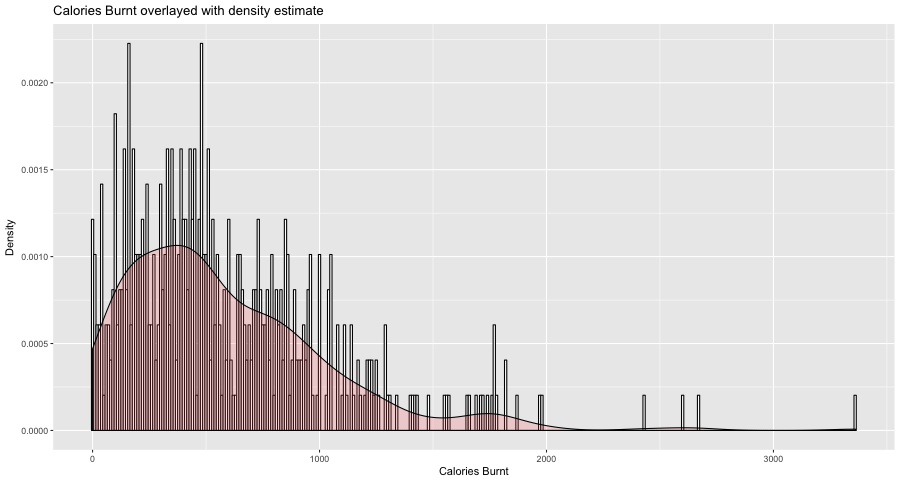

In [128]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=10,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

In [129]:
%R rm(list = ls())

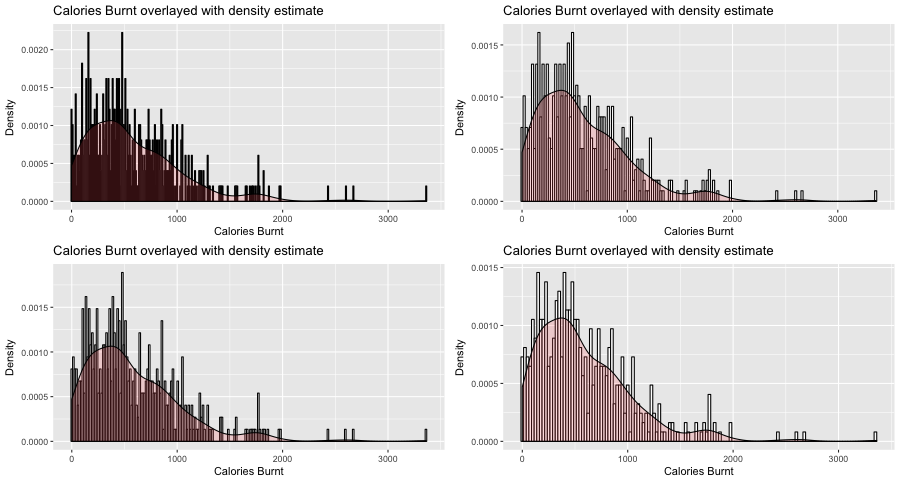

In [130]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

g1 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=10,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g2 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=15,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g3 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=20,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g4 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=25,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

multiplot(g1, g2, g3, g4, cols=2)

In [131]:
%R rm(list = ls())

** Analysis of the above visualizations: **

1. In the plot above, we see a distribution of Calories burnt on the x-axis along with their frequency and densities plotted.
2. The Distribution is clearly normal and multi-modal skewed towards the right, which can be understood as the practice runs while I was training for my first full Marathon in 2016 had the highest amount of calories burnt, with the marathon having more than 3000 calories burnt in a workout. 
3. Also, the normal workout session involved around 400-500 calories, which has the highest count and am happy to see a lot of workouts also in the range of 1000 and above calories burnt.
4. Varying the binwidth also shows similar underlying distribution for the calories burnt.

** *ii. Distribution of Calories Burnt across various Activities* **

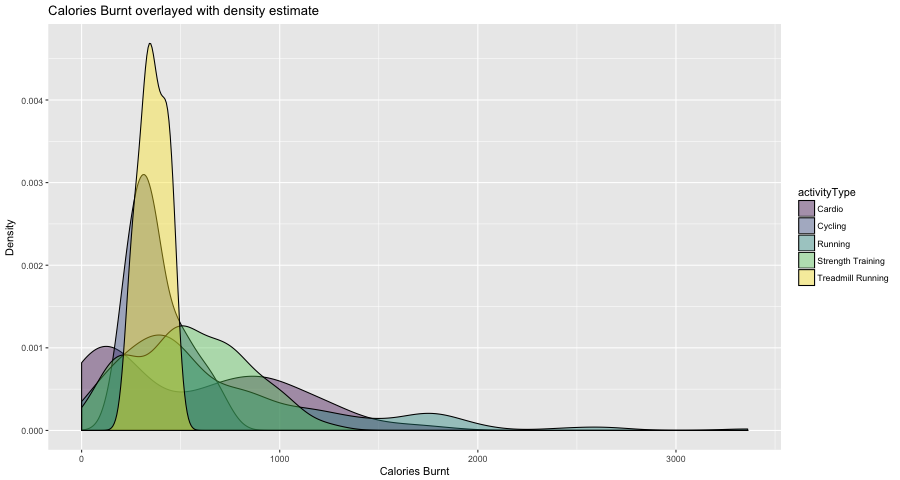

In [132]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

g1 <- ggplot(running_data, aes(x=calories, fill=activityType)) + 
    geom_density(alpha=0.4, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") + scale_fill_viridis(discrete=TRUE) +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")
g1

In [133]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Calories Burnt on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distributions are nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual calories burnt doing a particular activity.

** *iii. Outlier Analysis of Calories Burnt across various Activities* **

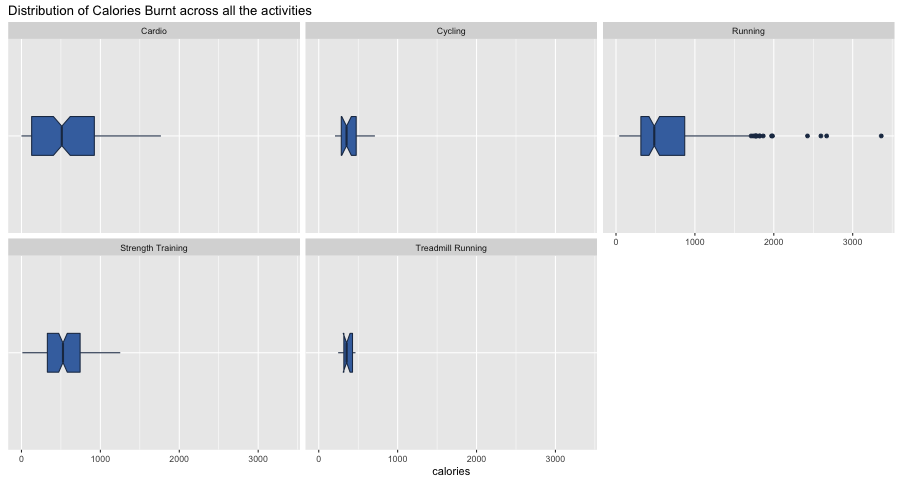

In [134]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=calories)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Calories Burnt across all the activities") + facet_wrap( ~ activityType)

In [135]:
%R rm(list = ls())

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Calories Burnt.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual calories doing a particular activity clearly.
3. Some of the observations which are worth highlighting are as follows: 
    * Strength Training sessions had no outliers and had a maximum of around 1800 calories burnt in a session.
    * Treadmill Running, even though are small in number but usually for a session did lead to around 500 calores burnt.
    * Running had the outliers in the right directions, which are all the practice runs leading upto the Full Marathon as well as the full Marathon.
    * Cycling sessions were mostly around 30 minutes in length, duration of Citibike rental and led to about similar calories burn and vary within a small range without significant outliers.

<a id="section5"></a>

## Multivariate Data Analysis

### Scatterplot Matrix for continuous features

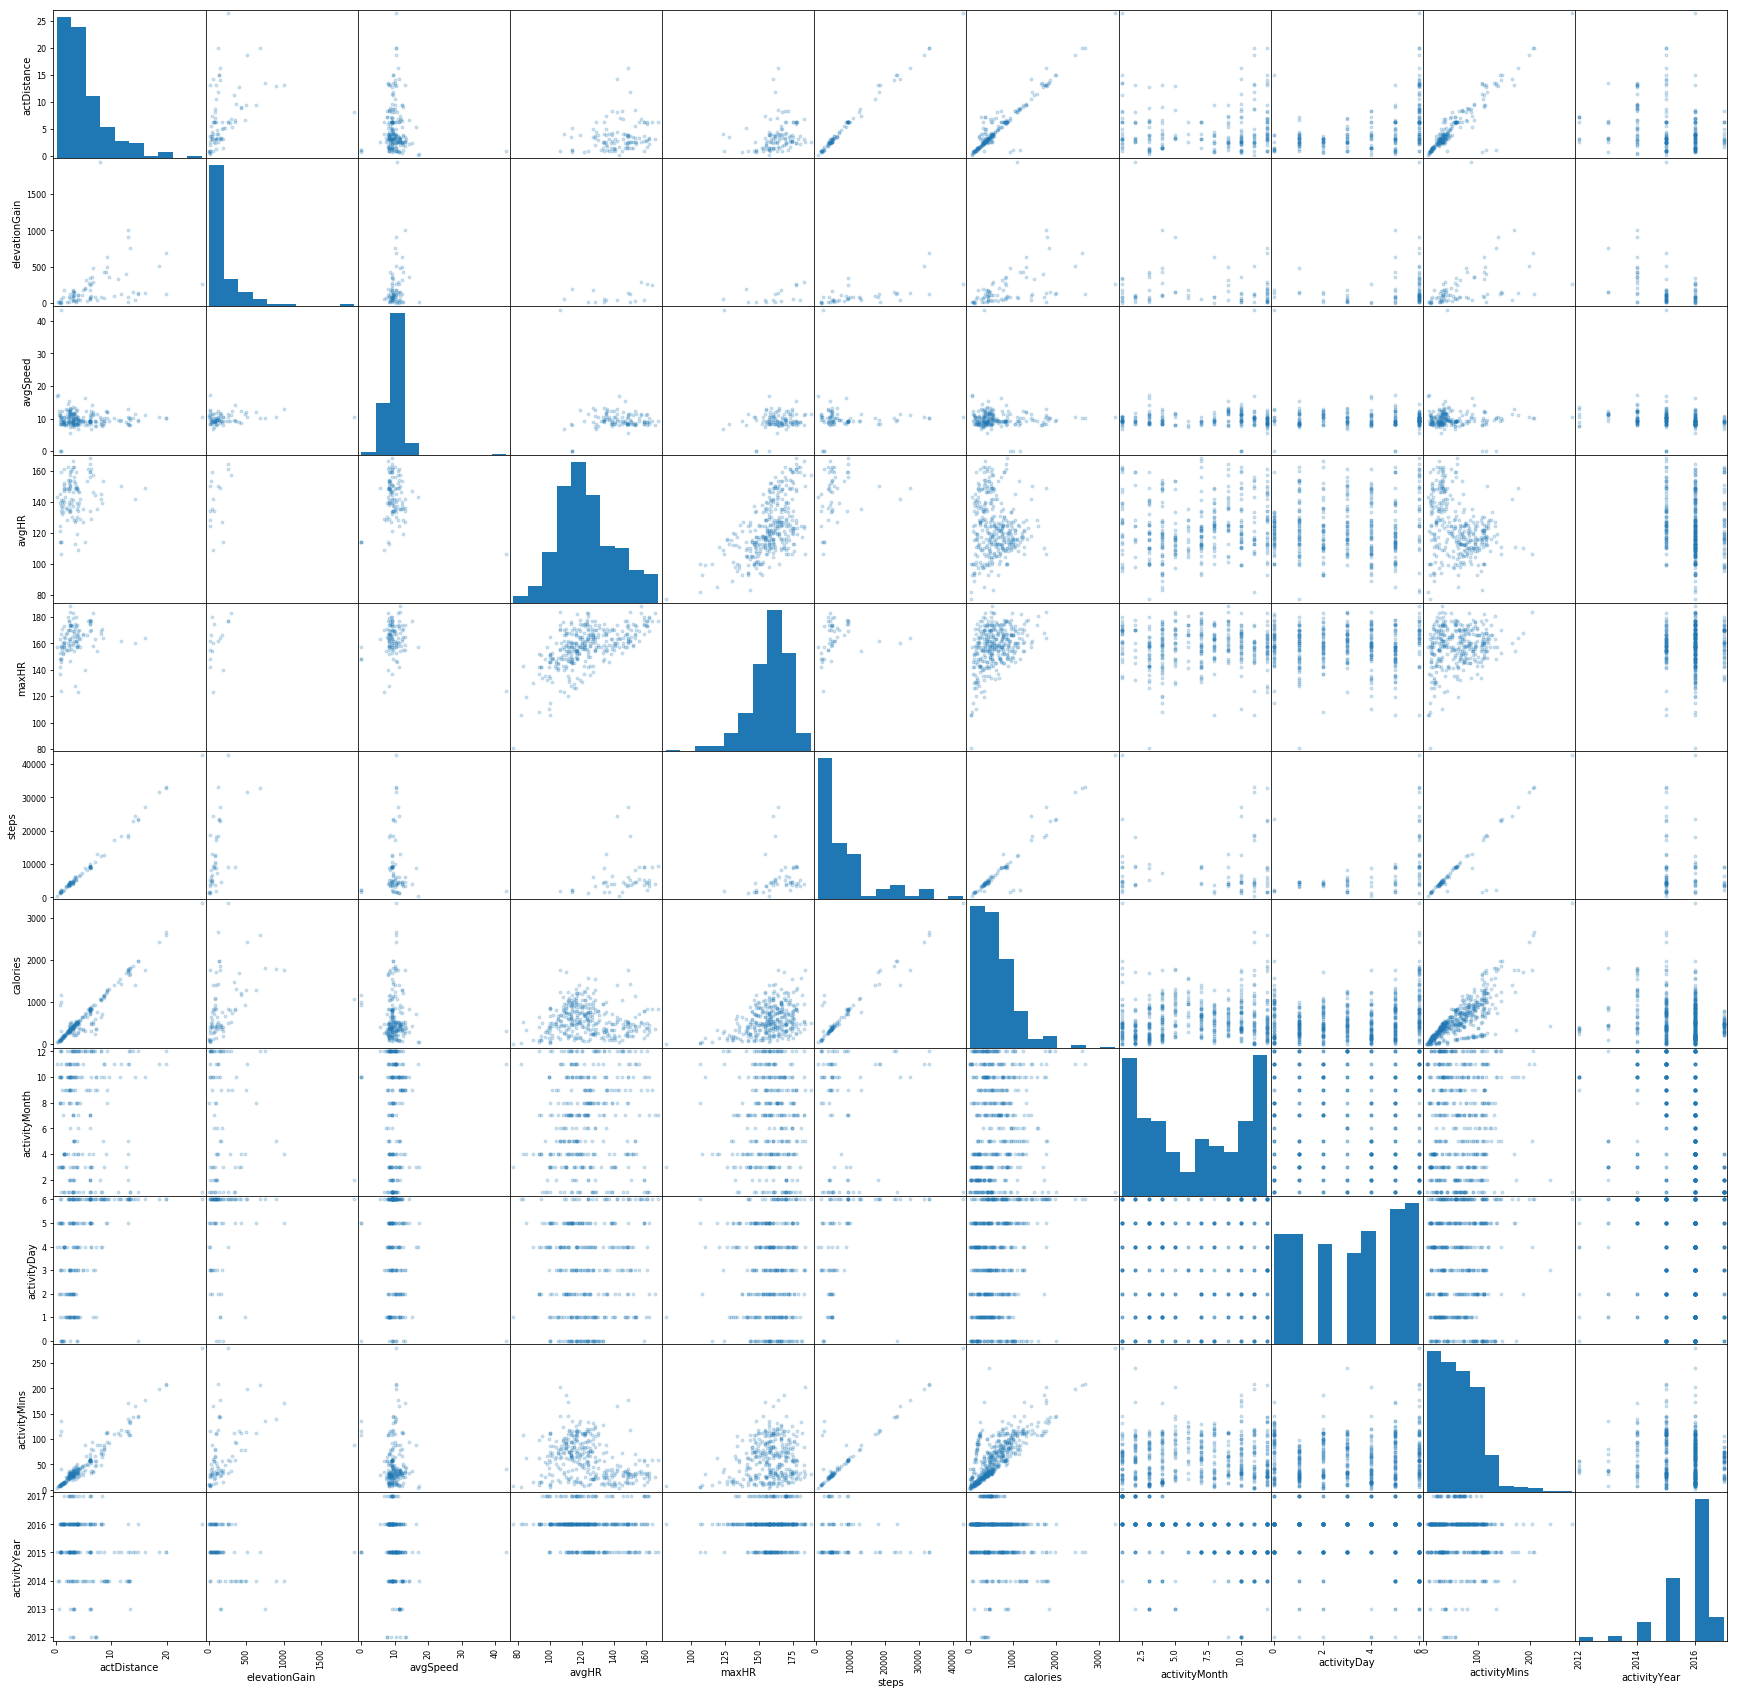

In [136]:
_ = pd.scatter_matrix(running_data, alpha=0.2, figsize=(30, 30))

** Analysis of the above visualization: **

A Scatterplot matrices is a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations amongst the dataset. Some observations are as follows:

* Calories burnt show approximately linear correlation with the minutes of a particular activity and the steps taken. 
* Heteroskedasticity is observed for variables calories with activity Minutes and also activityMins and elevationGain.

## Observing Trends from the Data 

<a id="section6"></a>

### Calories Burnt trend for all the activities from 2012-17 (Interactive D3.js visualization)

** The result for this visualization is also available at [Visualization Link](https://anujk3.github.io/edav-project/vis1.html)** (Inspired by learning from the course *Storytelling with Data*)

In [137]:
HTML('<iframe width="995" height="770" frameborder="0" \
     src="https://anujk3.github.io/edav-project/vis1.html" \
     allowfullscreen webkitallowfullscreen mozallowfullscreen \
     oallowfullscreen msallowfullscreen></iframe>')

** Analysis of the above visualization: **

1. In the plot above, we see all the activities plotted as separate bar plots in decreasing order of time range from 2017 to 2012.
2. The highest calories burnt can easily be seen for the events involving running, with around a 1000 calories burnt in every session.
3. Since moving to New York, that is the inital part of the plot, the focus has shifted from running to mostly strength training sessions and some Citibike rides because of yearly membership.
4. The fitness tracking journey started with mostly tracking the runs (rightmost part of the chart) and slowly with the improved fitness trackers bought with it, I started capturing more data about myself.
5. The reduced calories burnt in the recent times(inital part of the chart) can be owed to me facing sub zero temperatures for the first time(moving to NY from India) as well as the hectic schedule of graduate school.
6. All over, there is a nice trend of equally distributed strength training sessions, cardio sessions and running sessions that have been tracked through the years by me.

<a id="section7"></a>

### Hour of the day for the activities and how has it changed over the past 5 years (Interactive D3.js visualization)

** The result for this visualization is also available at [Visualization Link](https://anujk3.github.io/edav-project/vis2.html)** (Inspired by learning from the course *Storytelling with Data*)

In [138]:
HTML('<iframe width="995" height="910" frameborder="0" \
     src="https://anujk3.github.io/edav-project/vis2.html" \
     allowfullscreen webkitallowfullscreen mozallowfullscreen \
     oallowfullscreen msallowfullscreen></iframe>')

** Analysis of the above visualization: **

1. In the plot above, the activities have been plotted as a scatter plot in increasing order of time range from 2012 to 2017. The time range can be selected by moving the time range slider. The x-axis is just an increasing time scale that has been shown using the Date Range Slider.
2. Most of the activity sessions for the past 5 years have been in the evening, which clearly show that I am not really a morning person. Specific activity sessions can be selected using their buttons and the date ranger can be moved to focus on the sessions done during that specific interval of time.
3. Since moving to New York, the rightmost part of the cumulative graph, I have mostly been doing the strength sessions late night at around 22:00 hour and some really late night cycle rides along the riverside.
4. The fitness tracking journey started with mostly tracking the runs (leftmost part of the chart) and slowly with the improved fitness trackers bought, I started capturing more data about myself. There is a decent distribution of data that has been captured in the last 5 years using various fitness trackers.
5. And looking at this visualization, I also realize that I have been missing the feel good factor after my long runs, and need to get back to running soon.

<a id="section8"></a>

### Trend : Activity minutes per month for years 2012-2016 (Interactive D3.js visualization)

** The result for this visualization is also available at [Visualization Link](https://anujk3.github.io/edav-project/vis3.html)** (Inspired by learning from the course *Storytelling with Data*)

In [139]:
activity_mins_agg = running_data.groupby(["activityYear", "activityMonth"]).activityMins.agg(["sum"])
activity_mins_agg.to_csv("vis3.csv")

In [140]:
HTML('<iframe width="995" height="720" frameborder="0" \
     src="https://anujk3.github.io/edav-project/vis3.html" \
     allowfullscreen webkitallowfullscreen mozallowfullscreen \
     oallowfullscreen msallowfullscreen></iframe>')

** Analysis of the above visualization: **

1. In the plot above, the total minutes of an activity have been plotted on the y-axis with its variation across the months for the years 2012-2016.
2. The tracking for the workout sessions began in 2012, with about 200 minutes of activity captured during the month of October, but was still not much into tracking at that time.
3. During the year 2013, I started initially tracking my runs and most of the activity minutes for the months in 2013 are due to the runs that have been captured.
4. During the year 2014, I was still only capturing my runs for the year and had a decent running time during most of the months from March - May, which reduced because of excess heat during June and July and then the I started training for a half marathon, due to which the activity minutes picked up during the end of 2014.
5. During the year 2015, I just ran a half marathon for the month of January and after that the cool down period started. Because of the advanced fitness trackers bought during 2015, from June I started capturing my strength training sessions along with the running sessions and along with it, I started preparing for a half marathon in December and full marathon in January, because of which there has been a high value of activity minutes recorded for the last half of 2015 season.
6. For the year 2016, I was running regularly and also training regularly for my runs in the gym, because of which there has been such high activity recorded for the year 2016. I also ran my first full marathon in January 2016 and therefore have high activity recorded for the month of January 2016. The reduction in activity minutes as 2016 progressed can be aided to the joining of Graduate school in NY and recording mostly my strength training sessions.

<a id="section9"></a>

### Trend : Running Mileage (kms) per month for years 2014-2016 (Interactive D3.js visualization)

** The result for this visualization is also available at [Visualization Link](https://anujk3.github.io/edav-project/vis4.html)** (Inspired by learning from the course *Storytelling with Data*)

In [141]:
running_data_km = running_data.loc[(running_data["activityType"] == "Running") | \
                              (running_data["activityType"] == "Treadmill Running") ]
running_data_kmagg = running_data_km.groupby(["activityYear", "activityMonth"]).actDistance.agg(["sum"])
running_data_kmagg.to_csv("vis4.csv")

In [142]:
HTML('<iframe width="995" height="720" frameborder="0" \
     src="https://anujk3.github.io/edav-project/vis4.html" \
     allowfullscreen webkitallowfullscreen mozallowfullscreen \
     oallowfullscreen msallowfullscreen></iframe>')

** Analysis of the above visualization: ** 

1. In the plot above, the running mileage has been plotted for every month of the years 2014-2016. I am only showing the data for these years as I was mostly capturing my running activities during these years.
2. For the year 2014, the running time has mostly varied with the running season in India. The running season starts around August and finishes with the Delhi Marathon and Mumbai Marathon in Decemeber and January respectively, showing higher kilometers run during those times of the year.
3. For the year 2015, after the Mumbai Marathon in January is when you rest and condition your body for the next running season. Even though in the previous plot I see that the recorded activity time is very high for the months in 2015, the actual running miles is less till the beginning of the running season in August-September. As I was preparing for my first full marathon in January 2016, the higher kilometer runs for the month of November and December 2015 are the due to the practice long runs for its preparation.
4. For the year 2016, the running kilometers are high for the year January when I was doing the practice runs and also ran my first full marathon. After that, I was just running about a long run once a week to keep conditioning along with the rest time after the season. In July-August, I was preparing to move to NY to join graduate school and during the initial months of moving to NY, I was still logging those kilometers due to the vicinity of Central Park near my house but as the semester proceeded and the workload increased along with extreme temperature, the running kilometers reduced significantly to even less than 10km during the previous years peak running months, i.e., November and Decemeber.

<a id="section10"></a>

### Total minutes spent on each activity type during the months in year 2012-17

In [144]:
year_month_act_mins = running_data.groupby(["activityYear", "activityMonthName", "activityType"]).activityMins.agg(["sum"])
year_month_act_mins.reset_index(inplace=True)
#year_month_act_mins

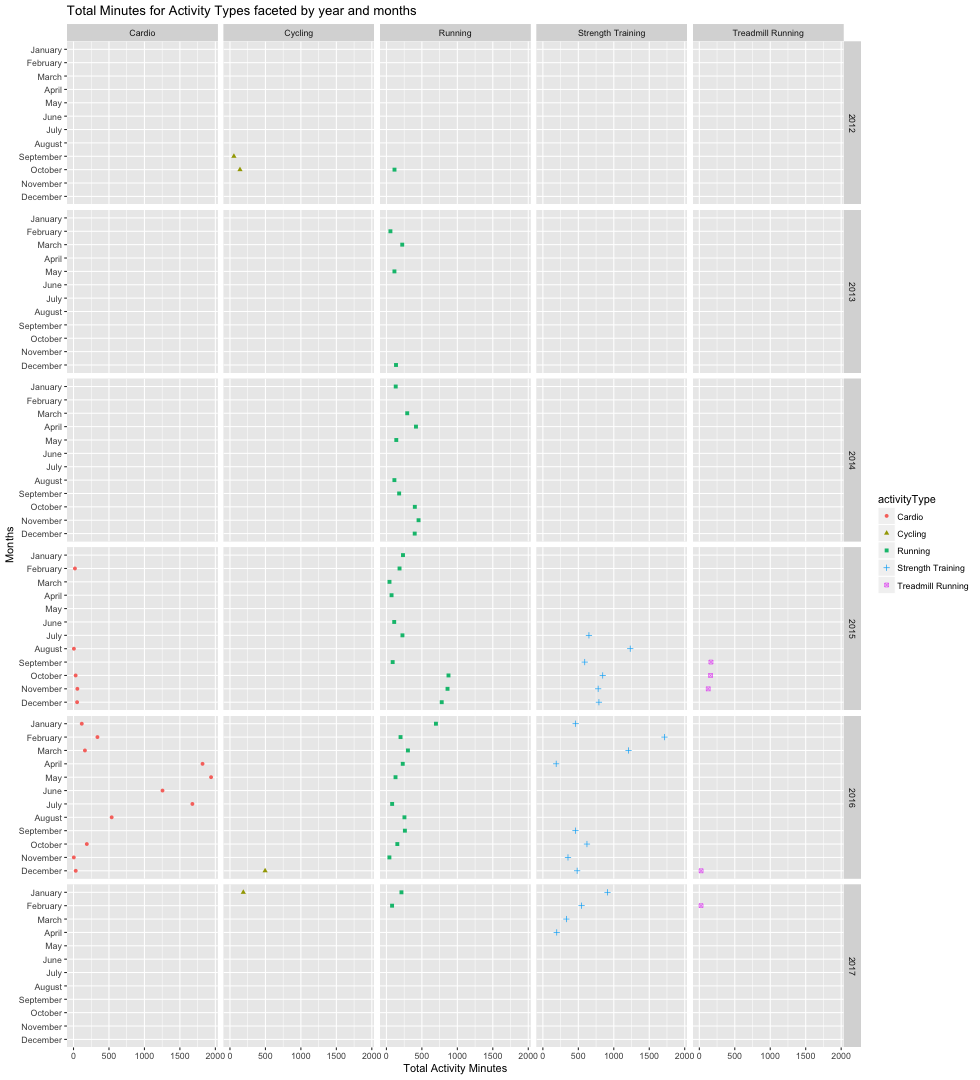

In [145]:
%%R -i year_month_act_mins -w 980 -h 1080 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
year_month_act_mins$activityMonthName <- factor(year_month_act_mins$activityMonthName, levels = rev(orderedclasses))

g1 <- ggplot(year_month_act_mins, aes(x=sum, y=activityMonthName)) + 
    geom_point(aes(color=activityType, shape = activityType)) +
    ylab("Months") + scale_fill_viridis(discrete=TRUE) +
    xlab("Total Activity Minutes") +
    ggtitle("Total Minutes for Activity Types faceted by year and months ") + 
    facet_grid(activityYear ~ activityType)
g1

** Analysis of the above visualization: ** 

1. In a single cleveland dot plot, we can visualize the total activity minutes (x-axis) that I spent in the years 2012-2017 for the months.
2. From the visualization, it is clear that running has been the most tracked activity during all the years followed by strength training, which has been tracked frequently from 2015 end.
3. The activity minutes spent on an average during the activities are easily seen.
4. As I am using a facet grid for the visualization, it was difficult for me to reorder it based on the total activity minutes for specific months in every year, as fields are shown both on the x-axis as well as the y-axis.

<a id="section11"></a>

### Analyzing average calories burnt for every activity type during the months of years 2012-17

In [146]:
year_month_cal_mins = running_data.groupby(["activityYear", "activityMonthName", "activityType"]).calories.agg(["mean"])
year_month_cal_mins.reset_index(inplace=True)
#year_month_cal_mins

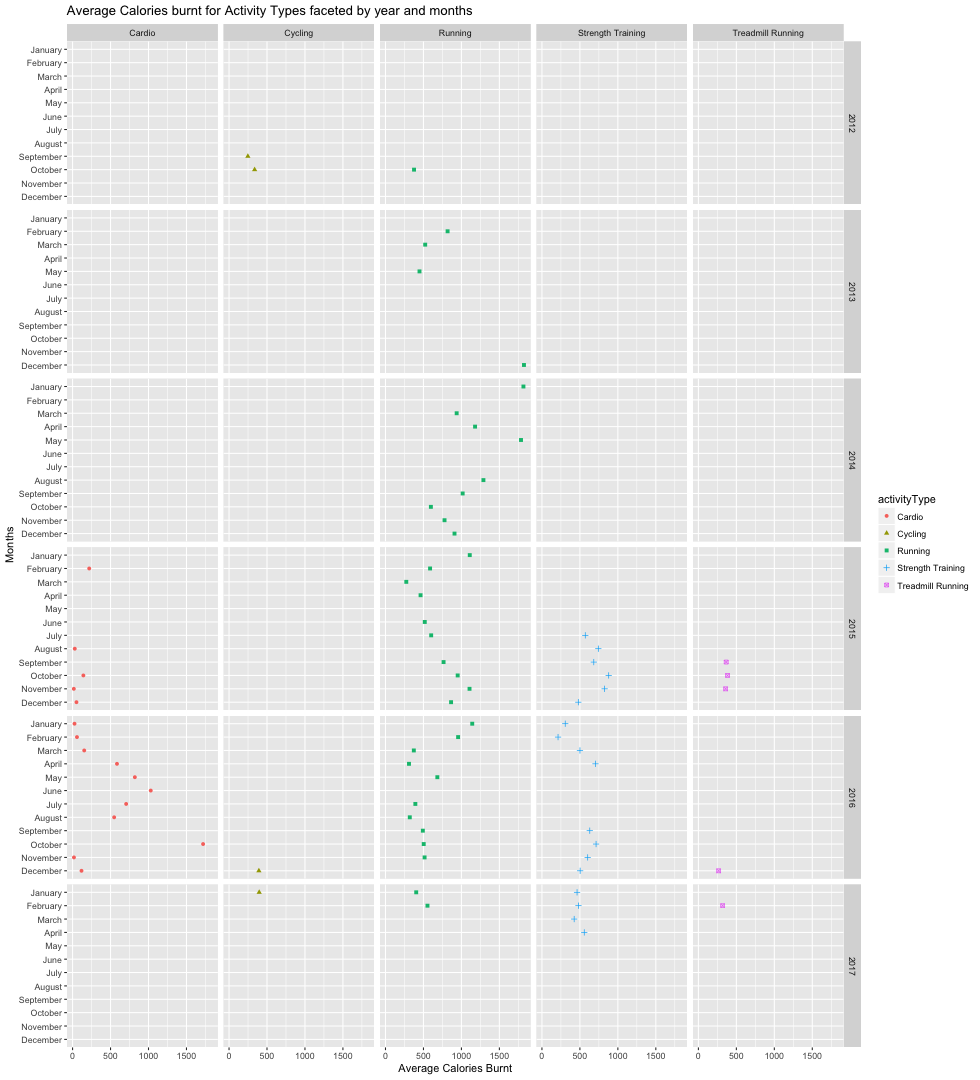

In [147]:
%%R -i year_month_cal_mins -w 980 -h 1080 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
year_month_cal_mins$activityMonthName <- factor(year_month_act_mins$activityMonthName, levels = rev(orderedclasses))

g1 <- ggplot(year_month_cal_mins, aes(x=mean, y=activityMonthName)) + 
    geom_point(aes(color=activityType, shape = activityType)) +
    ylab("Months") + scale_fill_viridis(discrete=TRUE) +
    xlab("Average Calories Burnt") +
    ggtitle("Average Calories burnt for Activity Types faceted by year and months ") + 
    facet_grid(activityYear ~ activityType)
g1

** Analysis of the above visualization: ** 

1. In a single cleveland dot plot, we can visualize the average calories burnt (x-axis) during the years 2012-2017 for the months.
2. From the visualization, it is clear that running has been the most tracked activity during all the years followed by strength training, which has been tracked frequently from 2015 end.
3. The average calories burnt are usually high for the running sessions and strength traning sessions as compared to cycling sessions or treadmill running sessions(because I don't run on the treadmill longer).
4. As I am using a facet grid for the visualization, it was difficult for me to reorder it based on the average calories burnt for specific months in every year, as fields are shown both on the x-axis as well as the y-axis.

<a id="section12"></a>

### How have my activity levels (based on average Heart Rate) varied along the days of the week?

** *i. Activity Levels and their variation along the aggregated days of the week* **

In [149]:
running_data_rec = running_data.loc[running_data["activityLevel"] != "Not Recorded", :]

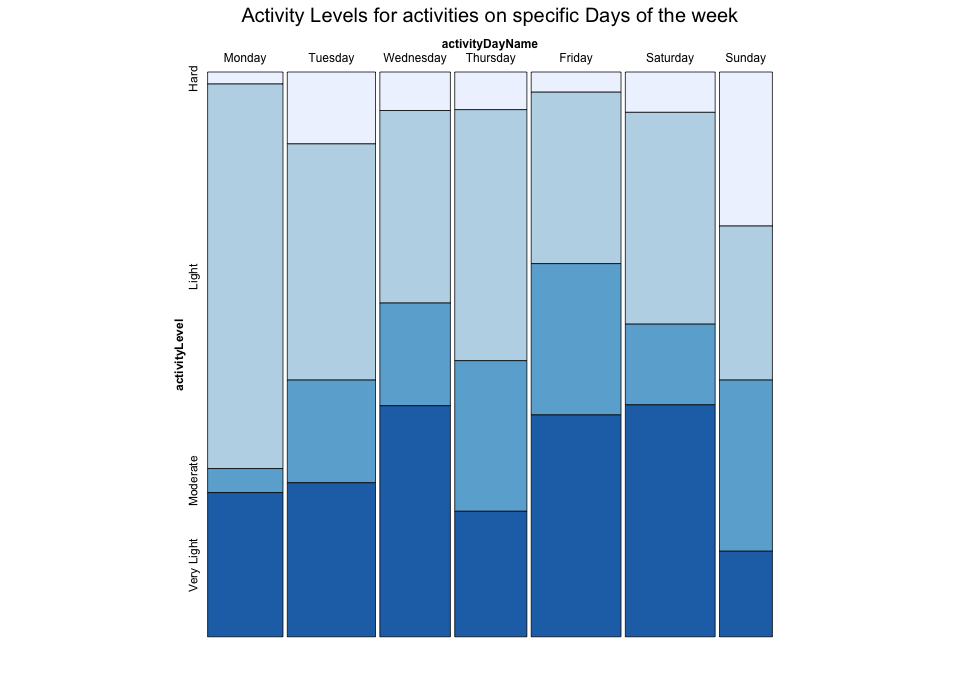

In [150]:
%%R -i running_data_rec -w 980 -h 680 -u px


library(vcd)
library(RColorBrewer)

mycolors <- brewer_pal(type = "seq")(4)

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_rec$activityDayName <- factor(running_data_rec$activityDayName, levels = orderedclasses)

vcd::mosaic(activityLevel ~ activityDayName, data = running_data_rec, gp = gpar(fill = mycolors), direction = c("v", "h"),
            main = "Activity Levels for activities on specific Days of the week")


** Analysis of the above visualization: ** 

1. In the mosaic plot above.

** *ii. Activity Levels and their variation along the aggregated activities* **

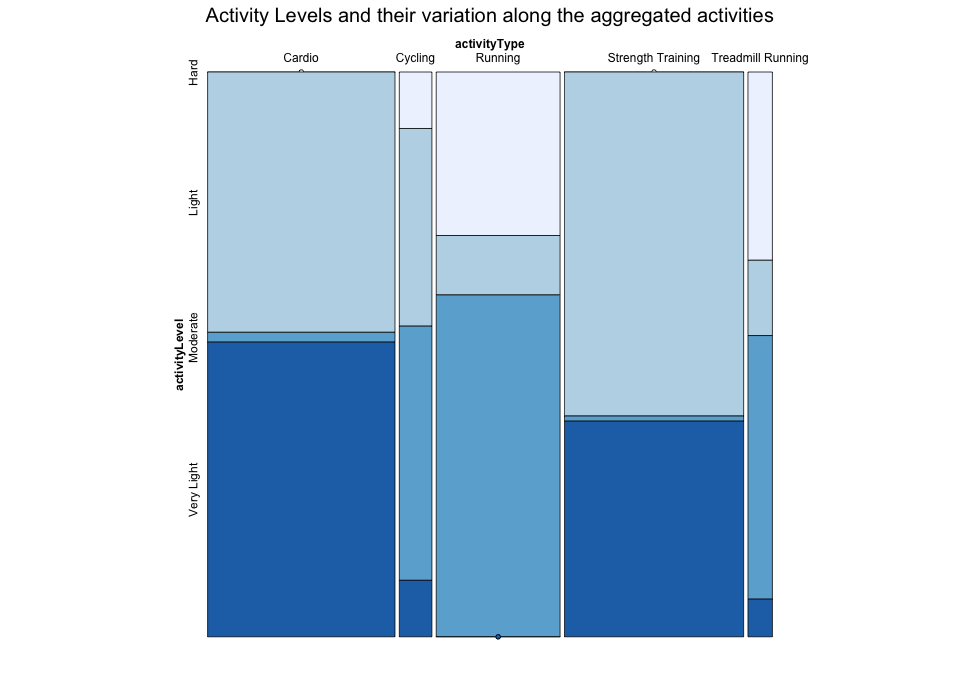

In [154]:
%%R -i running_data_rec -w 980 -h 680 -u px


library(vcd)
library(RColorBrewer)

mycolors <- brewer_pal(type = "seq")(4)

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_rec$activityDayName <- factor(running_data_rec$activityDayName, levels = orderedclasses)

vcd::mosaic(activityLevel ~ activityType, data = running_data_rec, gp = gpar(fill = mycolors), direction = c("v", "h", "v"),
            main = "Activity Levels and their variation along the aggregated activities")



### Conclusion

---

---